# 第16章 回帰不連続デザインの応用
### アメリカの下院議員選挙のデータに回帰不連続デザインを適用し、現職の議員がどれくらい有利かを見てみる。
  
y: 時点t における民主党候補者の得票率  ex.t=117なら第11期議会在籍    
x1:時点t-1における (民主党候補者の得票率) - (共和党候補者の得票率)  

民主党候補者が当選した場合、x1> 0. 民主党候補者の得票率が共和党候補者のそれよりも大きい

In [5]:
rm(list = ls())
data16 <- read.csv('./exc_data/data16.csv')
attach(data16) # attachでdataframe化
summary(data16)

The following objects are masked from data16 (pos = 3):

    x1, y1


The following objects are masked from data16 (pos = 4):

    x1, y1




       y1               x1          
 Min.   :0.0000   Min.   :-1.00000  
 1st Qu.:0.3857   1st Qu.:-0.19557  
 Median :0.5401   Median : 0.08314  
 Mean   :0.5511   Mean   : 0.12747  
 3rd Qu.:0.7021   3rd Qu.: 0.41292  
 Max.   :1.0000   Max.   : 1.00000  

In [6]:
# 割付変数を定義する
c1 <- 0 #今回の閾値。 x1(得票率diff 民主-共和) > 0
t1 <- NULL
t1[x1<=c1] <- 0
t1[x1>c1] <- 1

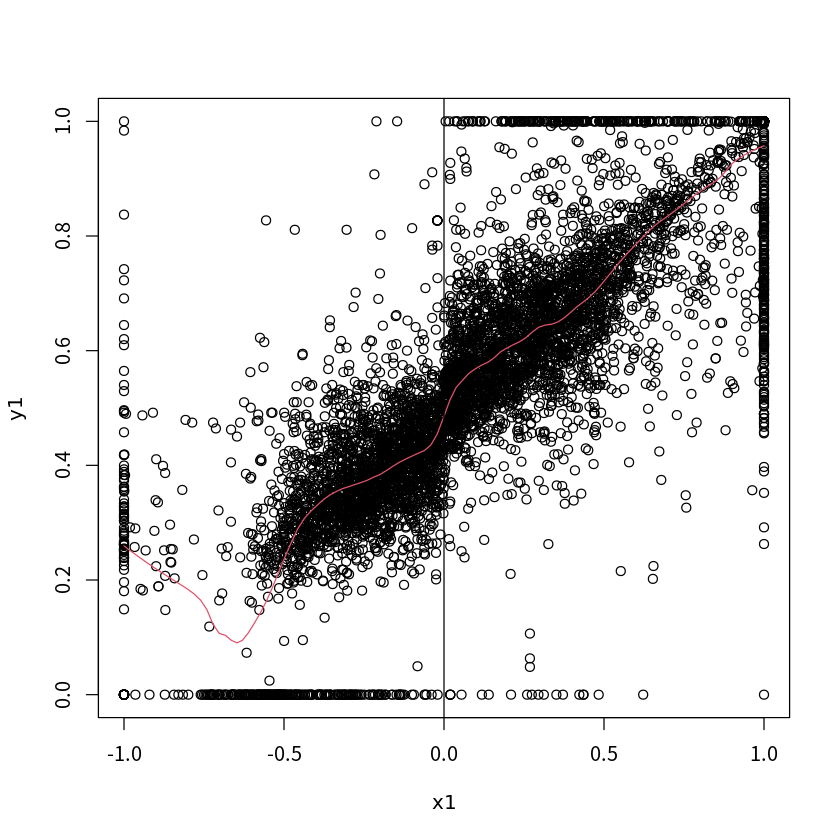

In [7]:
#可視化する
plot(x1, y1, xlim=c(-1, 1), ylim=c(0, 1)) #散布図を作成
lines(lowess(x1, y1, f=0.1), col=2)  #lowess曲線を描画. 引数fは平滑化の度合い. colはcolor 1:black, 2:red
abline(v=c1) # 閾値 x1=0に垂直に線を引く

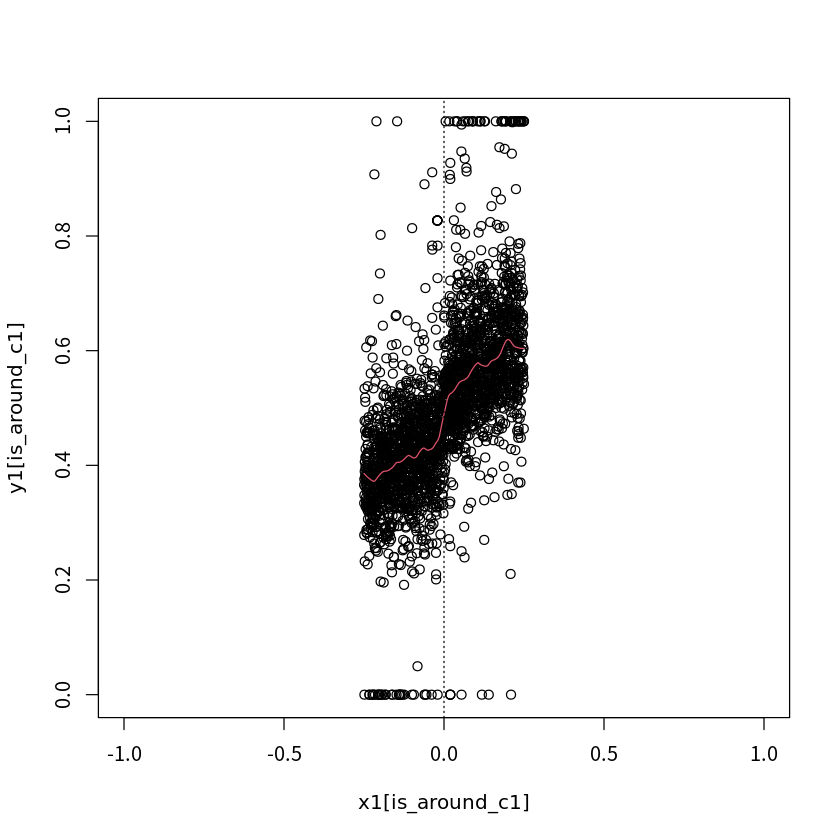

In [8]:
#閾値の周辺に絞って 可視化する
h1 <- 0.25 #閾値から+-どこまで見るかの幅
is_around_c1 <- (x1 > (c1 -h1) & x1 < (c1 + h1)) # c1-h1 < x1 < c1+h1 をx1が満たす場合TRUE, 満たさない場合FALSEを返す

plot(x1[is_around_c1], y1[is_around_c1], xlim=c(-1, 1), ylim=c(0, 1)) #散布図をis_arounc_c1=Trueに限って作成
lines(lowess(x1[is_around_c1], y1[is_around_c1], f=0.1), col=2)  #lowess曲線を描画
abline(v=c1, lty=3) # 閾値 x1=0に垂直に線を引く

Warning message in par(new = TRUE):
“ プロットなしで par(new=TRUE) を呼び出しました ”


[1] 3 4

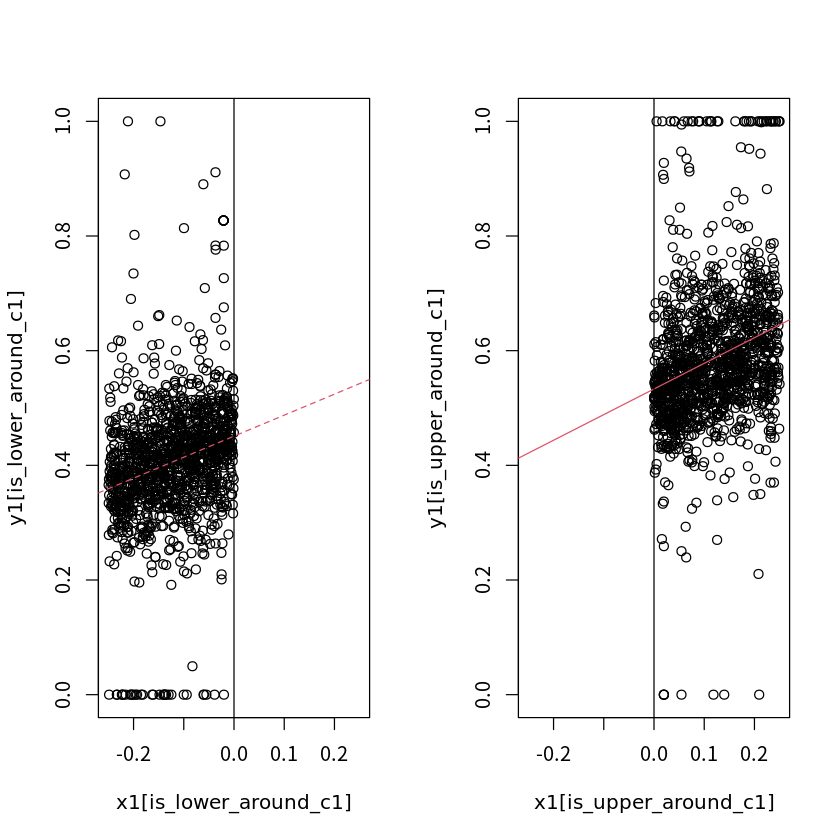

In [11]:
#閾値より下, 上のデータを分けて可視化する

## 下 ### 下側で局所線形回帰して直線を描画
is_lower_around_c1 <- (x1 > (c1 -h1) & x1 < c1) # c1-h1 < x1 < c1 
modelRDD2 <- lm(y1[is_lower_around_c1] ~ x1[is_lower_around_c1]) #単回帰でfit


## 上 ##
is_upper_around_c1 <- (x1 > c1 & x1 < (c1 + h1)) # c1 < x1 < c1+h1
modelRDD3 <- lm(y1[is_upper_around_c1] ~ x1[is_upper_around_c1])


#グラフを横並び表示. screen1 を 1 行 2 列に分割（左の screen1 と右の screen2 ができる）
split.screen(figs = c(1, 2))

screen(1) # 下側のグラフ
plot(x1[is_lower_around_c1], y1[is_lower_around_c1], xlim=c(-h1, h1), ylim=c(0, 1)) #散布図を下側に限って作成。x軸も局所のみで表示
abline(modelRDD2, col=2, lty=2) # lty:線の種類. 1:実線 2:短い破線
abline(v=c1)

screen(2) # 上側のグラフ
plot(x1[is_upper_around_c1], y1[is_upper_around_c1], xlim=c(-h1, h1), ylim=c(0, 1))
abline(modelRDD3, col=2)
abline(v=c1)

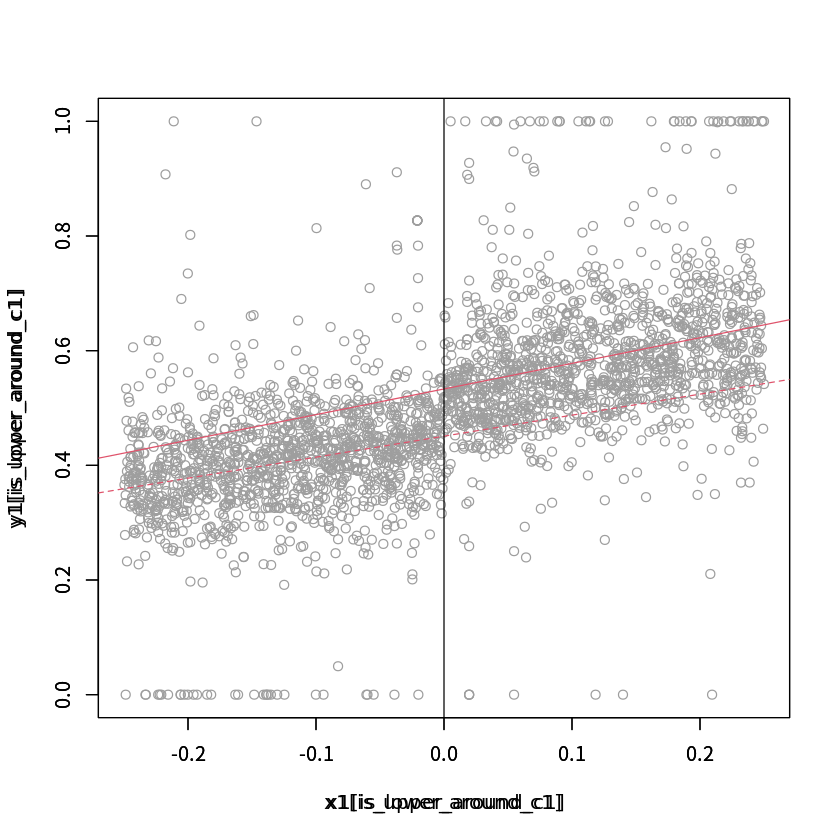

In [12]:
# 上下に分けたデータと局所線形回帰線を一つのグラフで可視化する
plot(x1[is_lower_around_c1], y1[is_lower_around_c1], xlim=c(-h1, h1), ylim=c(0, 1), col=8) #col 8:gray
par(new=TRUE)
plot(x1[is_upper_around_c1], y1[is_upper_around_c1], xlim=c(-h1, h1), ylim=c(0, 1), col=8)

abline(modelRDD2, col=2, lty=2) # lty:線の種類. 1:実線 2:短い破線
abline(modelRDD3, col=2)
abline(v=c1)

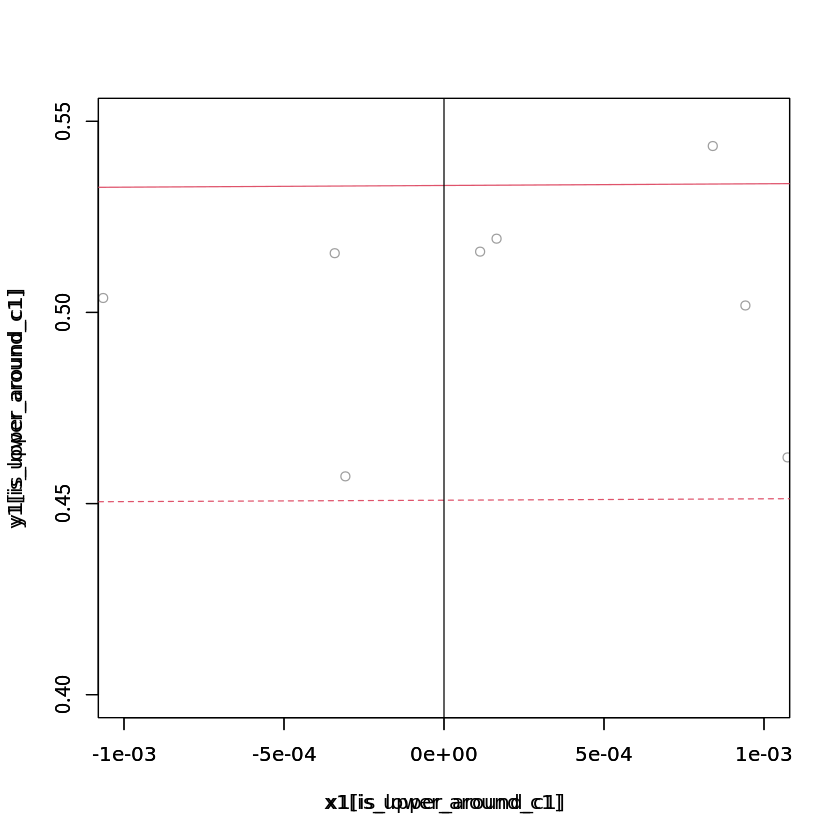

In [13]:
# 閾値 x1=0付近をズームする
h2 <- 0.001
plot(x1[is_lower_around_c1], y1[is_lower_around_c1], xlim=c(-h2, h2), ylim=c(0.4, 0.55), col=8) #col 8:gray
par(new=TRUE)
plot(x1[is_upper_around_c1], y1[is_upper_around_c1], xlim=c(-h2, h2), ylim=c(0.4, 0.55), col=8)

abline(modelRDD2, col=2, lty=2) # lty:線の種類. 1:実線 2:短い破線
abline(modelRDD3, col=2)
abline(v=c1)

上のグラフからx1=0における、実線(1期前に当選していた人)と点線(1期前は負けたor出馬なしの人)では実線のほうが点線より0.53-0.45=0.08高い  
すなわち当落線上にいる人々では、現職のほうが得票率で8pt有利といえる  

In [18]:
# Tips: 指定範囲内の観測数を知りたいとき
length(x1[is_around_c1])
length(x1[is_lower_around_c1])
length(x1[is_upper_around_c1])

[1] 2763

[1] 1376

[1] 1387

## 重回帰分析から局所的平均処置効果を求める
さきほどまでは目視で効果を求めたが、モデルからも効果を推定することができる。 Rのパッケージがそろっているのでお手軽。  
coeftestの結果の`t1[is_around_c1]`行の係数を見ると0.0823..で目視と近い値が得られている事がわかる。

In [17]:
# 初回のみinstall.~~を実行
# install.packages("lmtest")
# install.packages("sandwich")
library(lmtest); library(sandwich)
tx1 <- t1 * x1

# h1 <- 0.25 #閾値から+-どこまで見るかの幅
# is_around_c1 <- (x1 > (c1 -h1) & x1 < (c1 + h1)) # c1-h1 < x1 < c1+h1 をx1が満たす場合TRUE, 満たさない場合FALSEを返す

# y = aT + bX + cTX の係数を求める 
modelRDD <- lm(y1[is_around_c1] ~ t1[is_around_c1] + x1[is_around_c1] + tx1[is_around_c1])
coeftest(modelRDD, vcov.=vcovCL) #こことひとつ下の行で不均一分散に頑健な標準誤差を算出。他の諸指標も算出される。
coefci(modelRDD, level=0.95, vcov.=vcovCL)


t test of coefficients:

                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.4508738  0.0055777 80.8345   <2e-16 ***
t1[is_around_c1]  0.0823459  0.0083868  9.8185   <2e-16 ***
x1[is_around_c1]  0.3665293  0.0413393  8.8664   <2e-16 ***
tx1[is_around_c1] 0.0806073  0.0630544  1.2784   0.2012    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


,2.5 %,97.5 %
(Intercept),0.43993684,0.46181077
t1[is_around_c1],0.06590076,0.09879099
x1[is_around_c1],0.28547013,0.44758850
tx1[is_around_c1],-0.04303136,0.20424597


In [20]:
####### ここまでやってきた処理はRパッケージ rdrobustでかんたんにできる ###########
# install.packages("rdrobust")
library(rdrobust)

modelRDD4 <- rdrobust(y1, x1, c=0, h=0.25, kernel="uniform")
summary(modelRDD4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Sharp RD estimates using local polynomial regression.

Number of Obs.                 6558
BW type                      Manual
Kernel                      Uniform
VCE method                       NN

Number of Obs.                 2740         3818
Eff. Number of Obs.            1376         1387
Order est. (p)                    1            1
Order bias  (q)                   2            2
BW est. (h)                   0.250        0.250
BW bias (b)                   0.250        0.250
rho (h/b)                     1.000        1.000
Unique Obs.                    2740         3818

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.082     0.008    10.165     0.000     [0.066 , 0.098]     
        Robust         -         -     5.903     0.000     [0.046 , 0.092]     


## RDプロット
通常の散布図とは異なり、RDプロットでは
- データのヒストグラム化 (プロットはx=bin_iのデータの**平均値**。 いくつかのbinに分割し、そのbinの中に入るデータの平均値を図示する)
- ヒストグラムのスムーズ化 (カーネル関数を使ってデータをある程度ならし、背後にある分布系をあぶり出す)

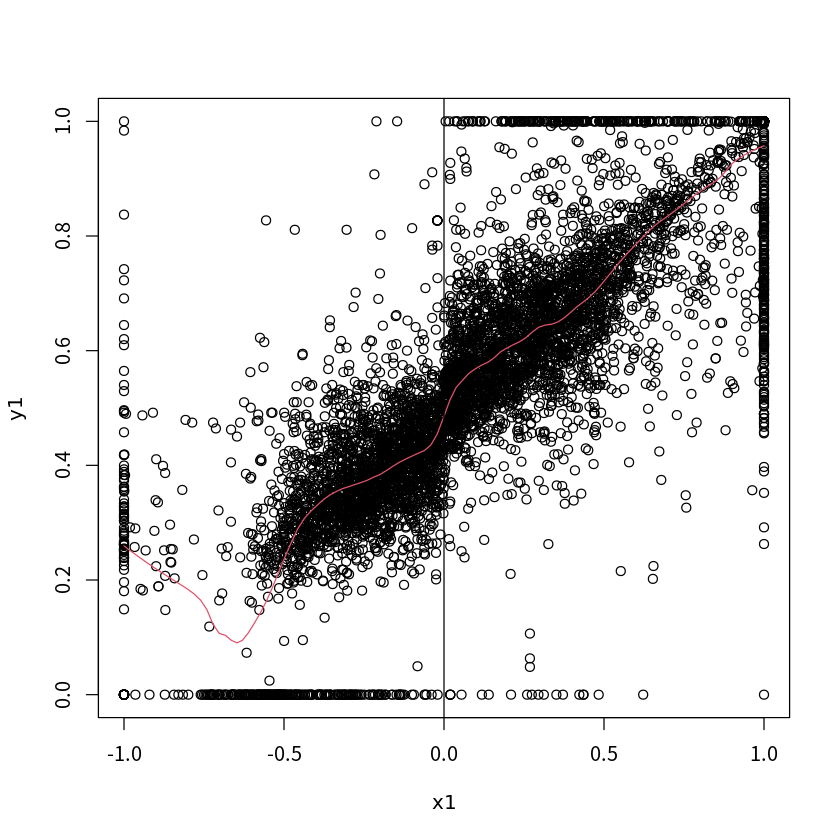

Call: rdplot

Number of Obs.                 6558
Kernel                      Uniform

Number of Obs.                 2740            3818
Eff. Number of Obs.            2740            3818
Order poly. fit (p)               4               4
BW poly. fit (h)              1.000           1.000
Number of bins scale              1               1

Bins Selected                    85             128
Average Bin Length            0.012           0.008
Median Bin Length             0.012           0.008

IMSE-optimal bins                20              17
Mimicking Variance bins          85             128

Relative to IMSE-optimal:
Implied scale                 4.250           7.529
WIMSE variance weight         0.013           0.002
WIMSE bias weight             0.987           0.998



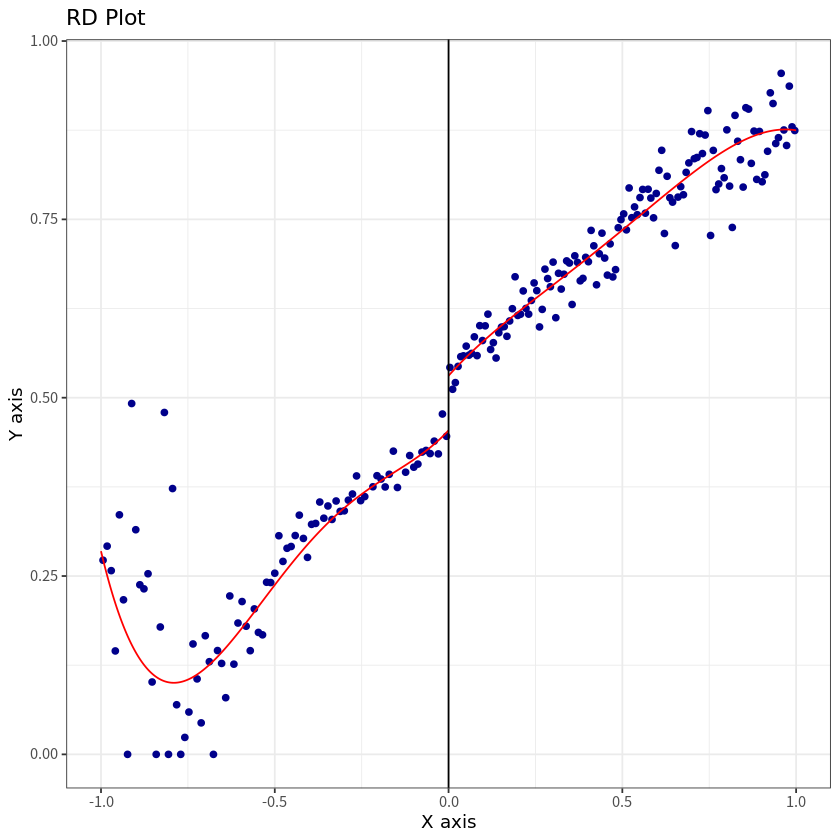

In [21]:
plot(x1, y1, xlim=c(-1, 1), ylim=c(0, 1)) # 散布図
lines(lowess(x1, y1, f=0.1), col=2)
abline(v=0)

rdp1 <- rdplot(y1, x1, c=0) # RDプロットを作成. 引数 x,yの順番がplot()と変わることに注意
summary(rdp1) # summaryでRDプロットを表示